# Model Fitting
Fit the model using the training dataset.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.lines import Line2D
import joblib

from src.data.labels_util import load_labels, LabelCol, get_labels_file, load_clean_labels, get_workouts
from src.data.imu_util import (
    get_sensor_file, ImuCol, load_imu_data, Sensor, fix_epoch, resample_uniformly, time_to_row_range, get_data_chunk,
    normalize_with_bounds, data_to_features, list_imu_abspaths, clean_imu_data
)
from src.data.util import find_nearest, find_nearest_index, shift, low_pass_filter, add_col
from src.data.workout import Activity, Workout
from src.data.data import DataState
from src.data.build_features import main as build_features
from src.data.features_util import list_test_files
from src.model.train import evaluate_model_accuracy, train_model, create_xgboost
from src.model.predict import evaluate_on_test_data, test_results
from src.visualization.visualize import multiplot
from src.config import (
    TRAIN_BOOT_DIR, TRAIN_POLE_DIR, TRAIN_FEATURES_FILENAME, TRAIN_LABELS_FILENAME, BOOT_MODEL_FILE, 
    POLE_MODEL_FILE
)

# import data types
from pandas import DataFrame
from numpy import ndarray
from typing import List, Tuple, Optional

## Evaluate quality of model and training data
[Helpful source](https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/)

In [2]:
# UNCOMMENT to use. It's very slow.

# print('Evaluate boot model:')
# features: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels)

In [3]:
# print('Evaluate pole model:')
# features: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels)

## Train model on training data
Copy the models to the ```models``` directory and change the paths in ```config.py``` to "publish" the models.

In [4]:
# UNCOMMENT to use. It's very slow.

# print('Train boot model:')
# train_model(Activity.Boot)

In [5]:
# print('Train pole model:')
# train_model(Activity.Pole)

## Test models

Test boot model:


<IPython.core.display.Javascript object>


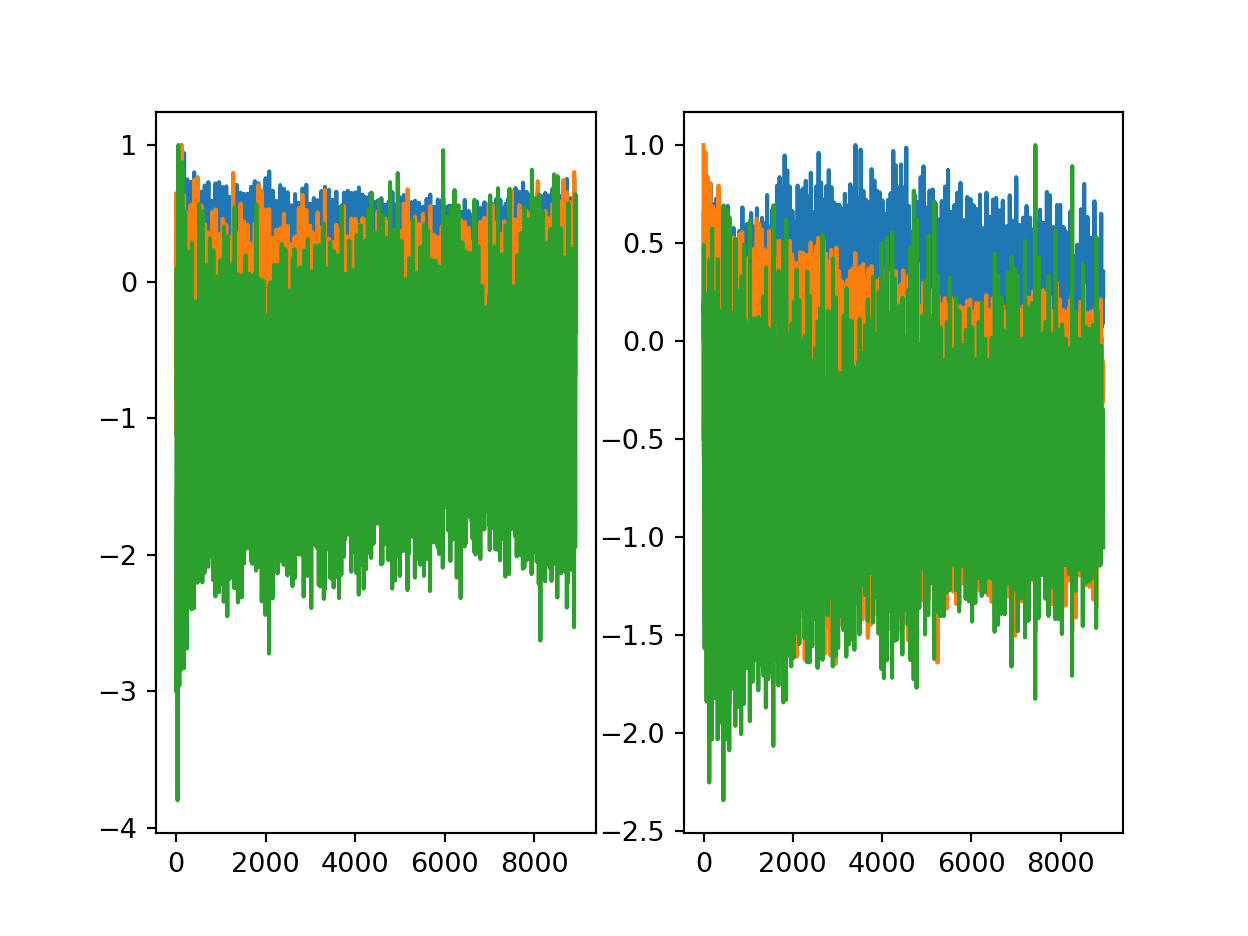

Accuracy score: 0.863224
Accuracy score: 0.670612


In [6]:
print('Test boot model:')
test_results(Activity.Boot, False)

Test pole model:


<IPython.core.display.Javascript object>


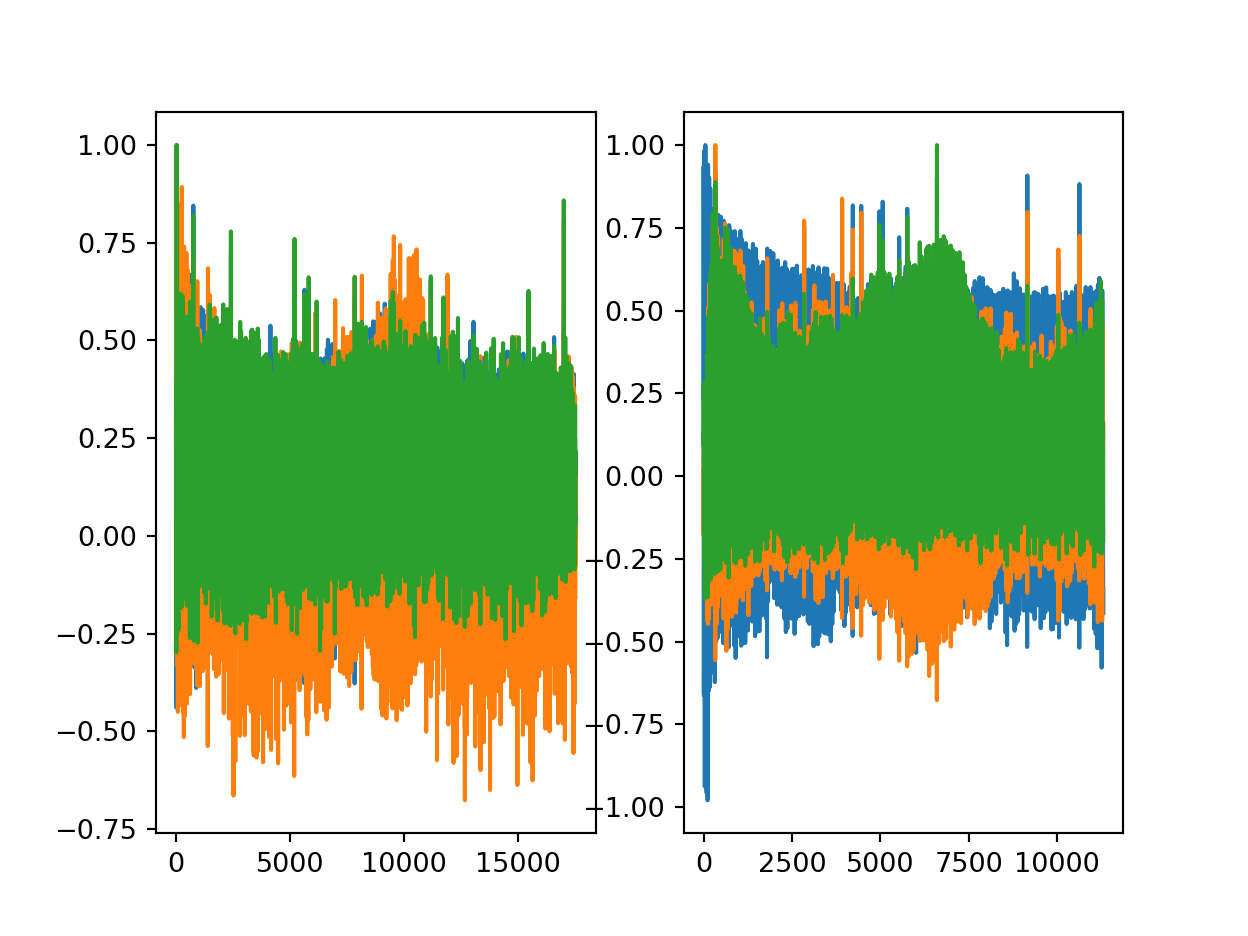

Accuracy score: 0.974085
Accuracy score: 0.969287


In [7]:
print('Test pole model:')
test_results(Activity.Pole, False)

## Try XGBoost
XGBosot is faster. This would allow me to use more features and test things faster.

In [8]:
# UNCOMMENT to use. It's very slow.

# print('Boot model:')
# features: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels, create_xgboost())

In [9]:
# print('Pole model:')
# features: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels)

### Train model

In [10]:
# print('Train boot model:')
# train_model(Activity.Boot, create_xgboost())

In [11]:
# print('Train pole model:')
# train_model(Activity.Pole, create_xgboost())

### Test model

Test boot model:


<IPython.core.display.Javascript object>


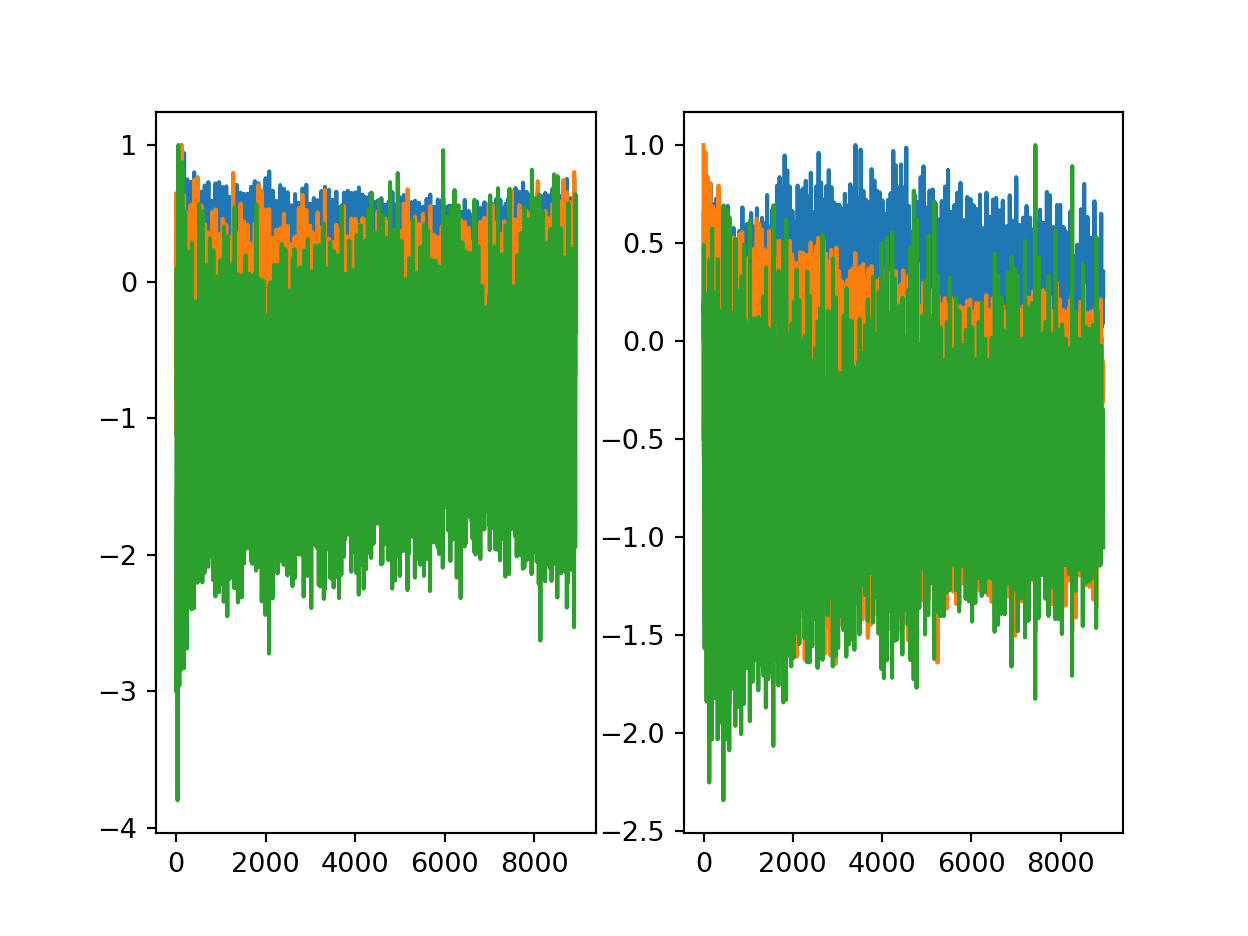

Accuracy score: 0.863224
Accuracy score: 0.670612


In [12]:
print('Test boot model:')
test_results(Activity.Boot, False)

Test pole model:


<IPython.core.display.Javascript object>


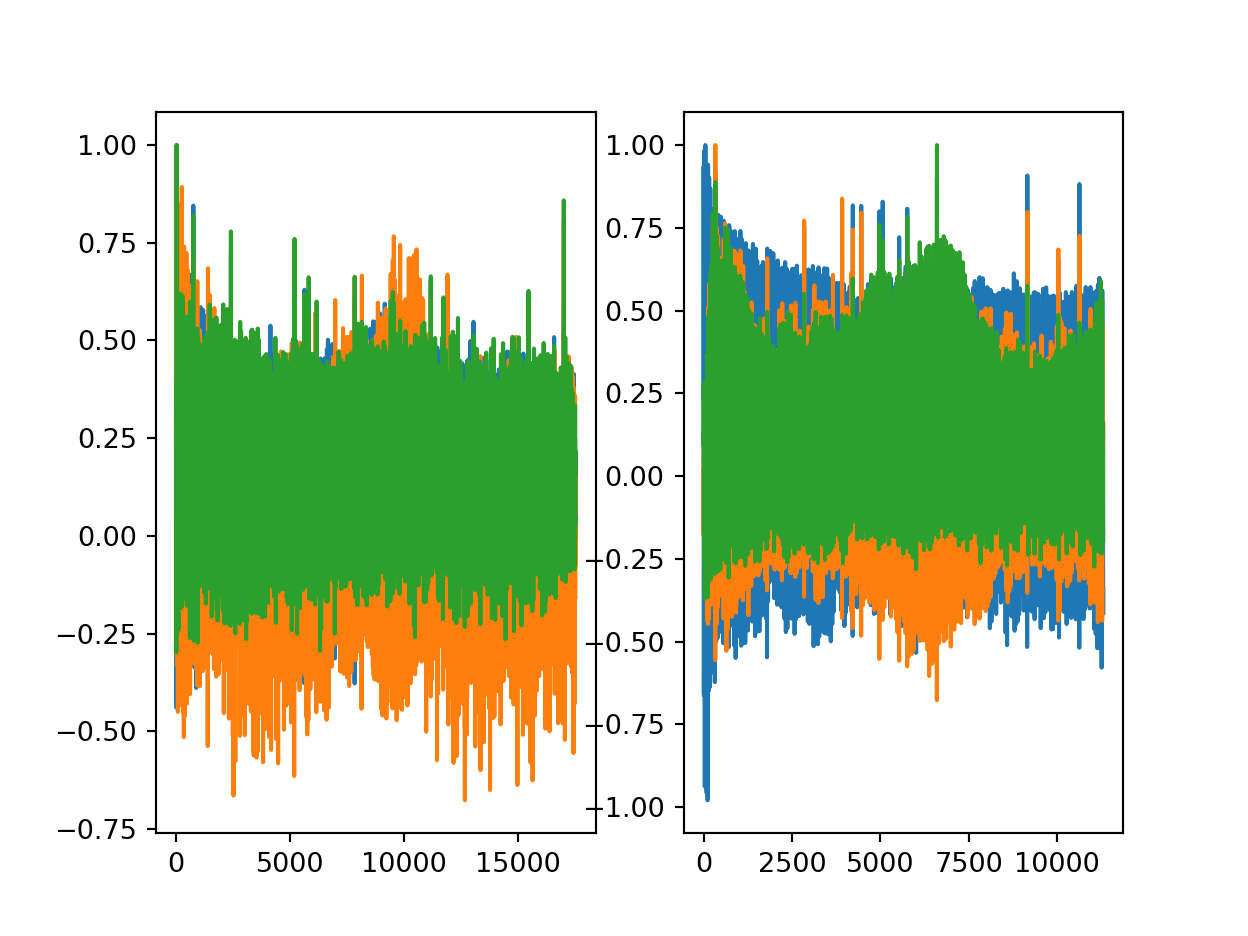

Accuracy score: 0.974085
Accuracy score: 0.969287


In [13]:
print('Test pole model:')
test_results(Activity.Pole, False)